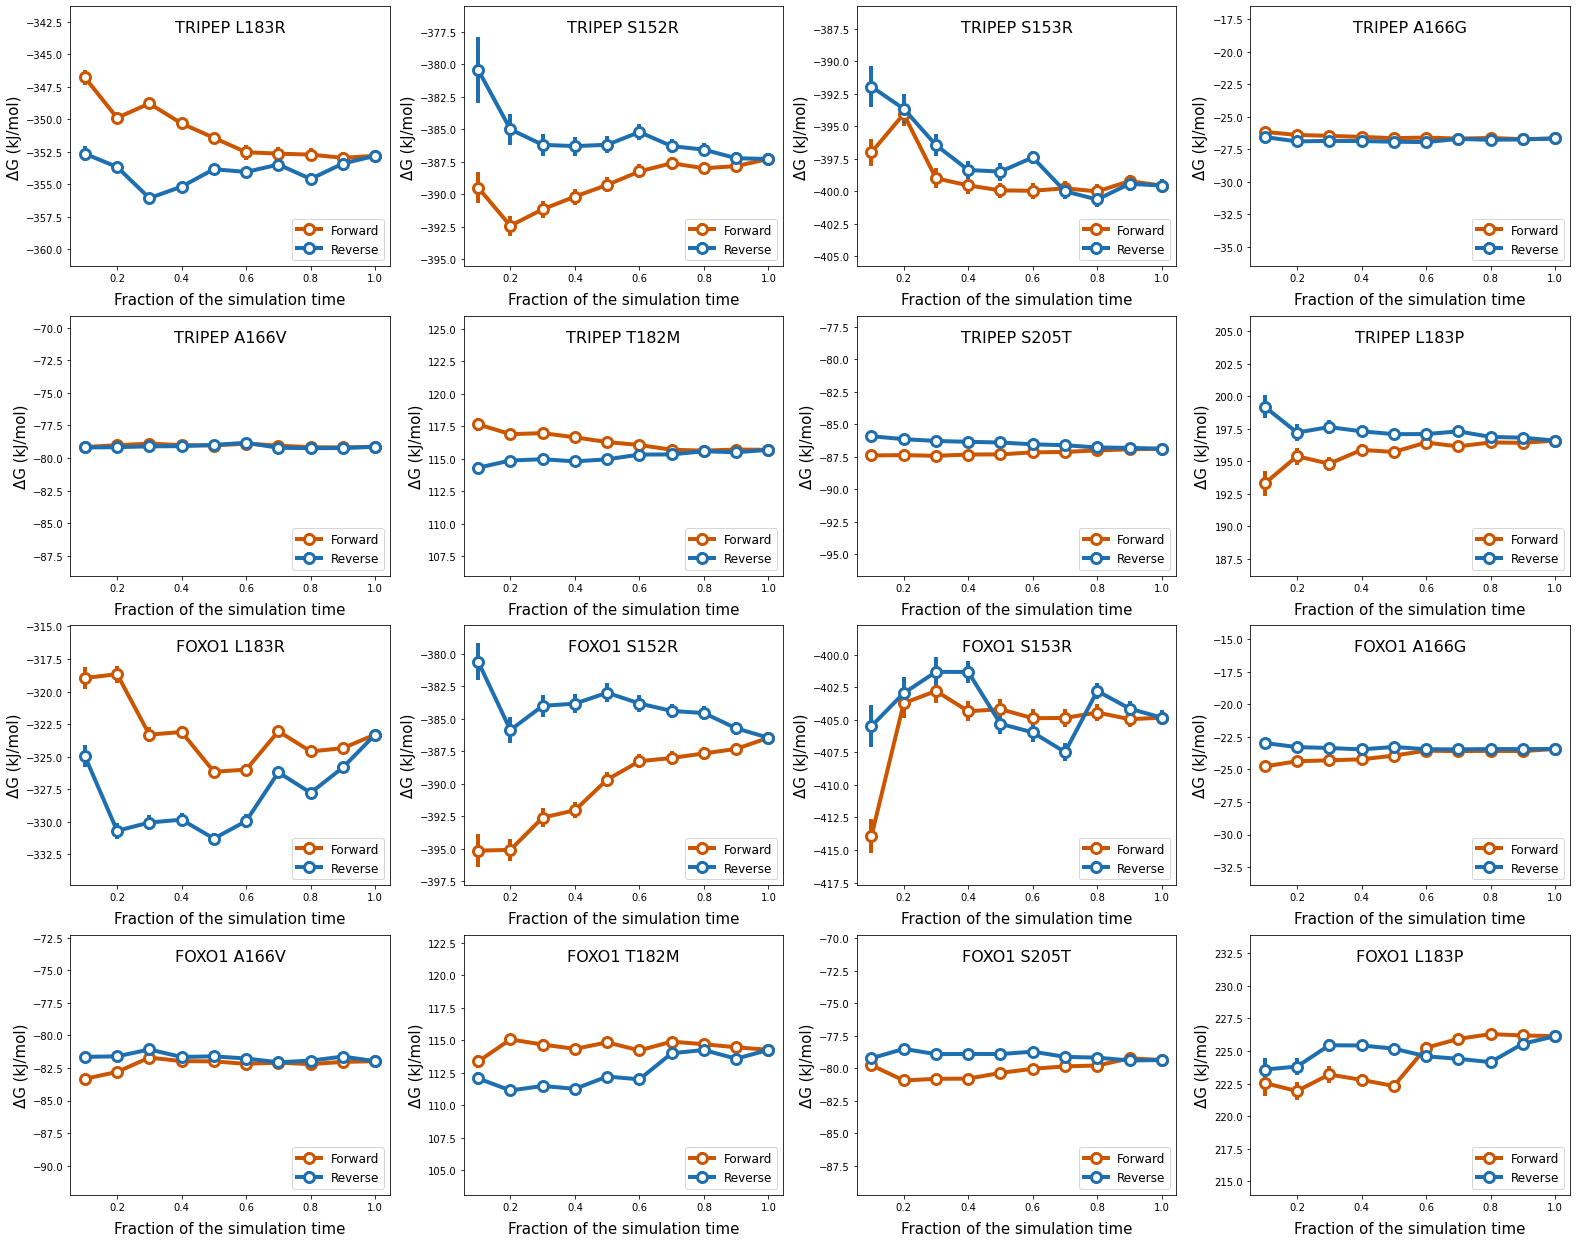

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

df = pd.read_excel("/home/leiqian/Documents/GROMACS_FOXO1/Graduation/images/figures/fig_si_1/converge_plots.xlsx", \
                   sheet_name=0, engine="openpyxl")

df = df.iloc[:, 1:]

colnames = list(df.columns)

grp1 = [0, 1, 2, 3] # modified
grp2 = [0, 1, 2, 3]
pairs = list(itertools.product(grp1, grp2))
# print(pairs)

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(22,17.3)) # modified

for i in range(0, 16): # modified
    
    index_0 = pairs[i][0]
    index_1 = pairs[i][1]
    ax = axes[index_0, index_1]
    title = colnames[i]

    Forward_list = list(df.iloc[:10, i])
    Forward_err_list = list(df.iloc[10:20, i])
    Reverse_list = list(df.iloc[20:30, i])
    Reverse_err_list = list(df.iloc[30:, i])

    # this is for x axis data list
    start = 1/len(Forward_list)
    step = 1/len(Forward_list)
    x = [round(start, 2)]
    for i in range(len(Forward_list)-1):
        start = round((start + step), 2)
        x.append(start)

    ax.errorbar(x, Forward_list, yerr=Forward_err_list, color="#CC5500", label="Forward", marker="o", linewidth=4, markerfacecolor='white', markersize=10, markeredgewidth=3)        
    ax.errorbar(x, Reverse_list, yerr=Reverse_err_list, color="#1E6FAF", label="Reverse", marker="o", linewidth=4, markerfacecolor='white', markersize=10, markeredgewidth=3)

    # adjust the y axis scale
    ymin, ymax = ax.get_ylim()
    # print(ymin, ymax)
    center = (ymax + ymin) / 2
    # print(center)
    ax.set_ylim([center-10, center+10])

    ax.set_xlabel('Fraction of the simulation time', fontsize=15)
    ax.xaxis.set_label_coords(0.5,-0.1)
    ax.set_ylabel('ΔG (kJ/mol)', fontsize=15)
    # ax.set_xticklabels(x, fontsize=15)

    ax.legend(loc='lower right', prop={'size':12})
    ax.text(0.5, 0.9, title, horizontalalignment='center', transform=ax.transAxes, size=16)

plt.tight_layout()

plt.savefig('/home/leiqian/Documents/GROMACS_FOXO1/Graduation/images/figures/fig_si_1/SI_Figure1.png', facecolor='white', \
            dpi=600) # modified 

plt.show()
